# Single Layer Network Example

Note: This notebook is desinged to run with CPU (no GPU) runtime.

####[SNE-01]
Import modules and set random seeds.

In [9]:
import os, random
import numpy as np
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models

random.seed(20230512)
np.random.seed(20160614)
tf.random.set_seed(20190825)

####[SNE-02]
Generate a training dateset.

In [10]:
def generate_datablock(n, mu, var, t):
    data = multivariate_normal(mu, np.eye(2)*var, n)
    df = DataFrame(data, columns=['x1', 'x2'])
    df['t'] = t
    return df

df0 = generate_datablock(15, [-8, -8], 22, 0)
df1 = generate_datablock(15, [ 7, -8], 22, 0)
df2 = generate_datablock(10, [-8,  7], 22, 0)
df3 = generate_datablock(25, [ 5,  5], 22, 1)

df = pd.concat([df0, df1, df2, df3], ignore_index=True)
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)

####[SNE-03]
Store the coordinates $(x_1,x_2)$ and label values $t$ into NumPy arrays.

In [11]:
train_x = train_set[['x1', 'x2']].values
train_t = train_set['t'].values

####[SNE-04]
Define a model for the binary classification using a single hidden layer.

In [12]:
model = models.Sequential()
model.add(layers.Input(shape=(2,), name='input'))
model.add(layers.Dense(2, activation='tanh', name='hidden'))
model.add(layers.Dense(1, activation='sigmoid', name='output'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden (Dense)                       │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

####[SNE-05]
Compile the model using the Adam optimizer, and Cross entroy as a loss function.

In [13]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

####[SNE-06]
Train the model.

In [14]:
%%time
history = model.fit(train_x, train_t,
                    batch_size=len(train_set), epochs=5000, verbose=0)

CPU times: user 2min 46s, sys: 5.88 s, total: 2min 51s
Wall time: 3min 13s


####[SNE-07]
Plot charts for the accuracy and loss values.

<Axes: >

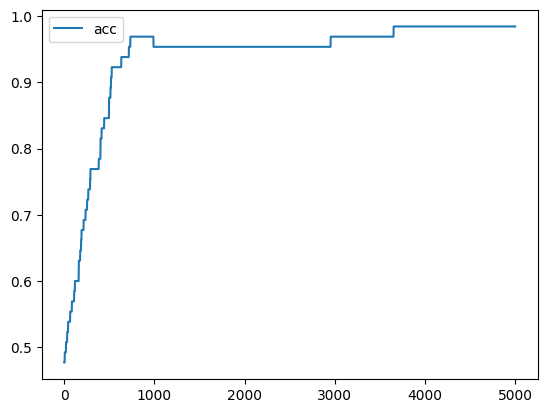

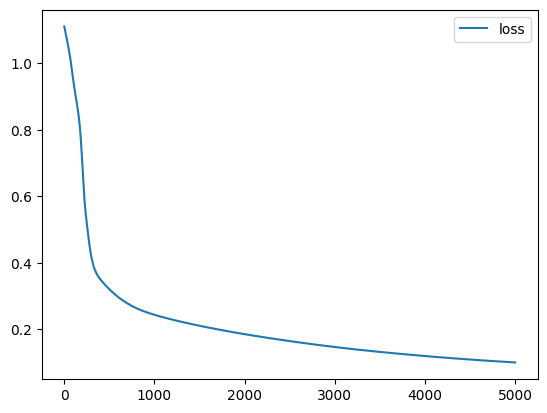

In [15]:
DataFrame({'acc': history.history['acc']}).plot()
DataFrame({'loss': history.history['loss']}).plot()

####[SNE-08]
Plot charts for the final result.

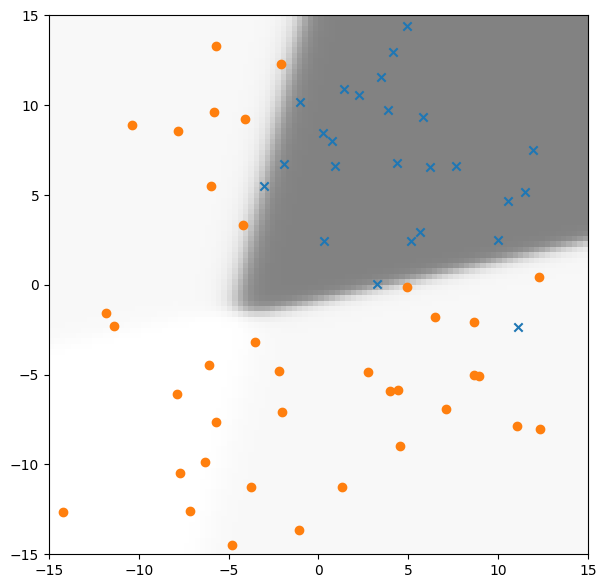

In [16]:
train_set1 = train_set[train_set['t']==1]
train_set2 = train_set[train_set['t']==0]

fig = plt.figure(figsize=(7, 7))
subplot = fig.add_subplot(1, 1, 1)
subplot.set_ylim([-15, 15])
subplot.set_xlim([-15, 15])
subplot.scatter(train_set1.x1, train_set1.x2, marker='x')
subplot.scatter(train_set2.x1, train_set2.x2, marker='o')

locations = [[x1, x2] for x2 in np.linspace(-15, 15, 100)
                      for x1 in np.linspace(-15, 15, 100)]
p_vals = model.predict(np.array(locations), verbose=0).reshape((100, 100))
_ = subplot.imshow(p_vals, origin='lower', extent=(-15, 15, -15, 15),
                   vmin=0, vmax=1, cmap=plt.cm.gray_r, alpha=0.5)